In [1]:
from Multi_model_ET import Multimodel_EnergyTransition
from Multi_model_ET.Multimodel_EnergyTransition import CombinedModel


filepath_multi = 'C:/Users/Dirk/Offline Multi-model/'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import math
from ema_workbench import (RealParameter, ScalarOutcome, Constant, Model)
import pyNetLogo
from datetime import datetime
from ema_workbench import (RealParameter, TimeSeriesOutcome, ema_logging,
                           perform_experiments, MultiprocessingEvaluator)



C:\Users\Dirk\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


In [2]:
multi_model = CombinedModel('UrbanEnergyTransition', wd = filepath_multi)


Start model initialisation
Setting up models took  0:01:52.902584


In [3]:
from ema_workbench import (RealParameter, CategoricalParameter, TimeSeriesOutcome, ArrayOutcome, ema_logging,
                           perform_experiments, MultiprocessingEvaluator)
from ema_workbench.connectors.vensim import  LookupUncertainty

start = datetime.now()
if __name__ == "__main__":
    # turn on logging
    ema_logging.log_to_stderr(ema_logging.INFO)

    # instantiate a model

    multi_model.uncertainties = [RealParameter('SD_Base Investments Renewable', 0.025, 0.125),
                                 RealParameter('SD_Maximum cost reduction', 0.1, 0.5),
                                 RealParameter('ABM_group-behaviour', 0, 1),
                                 RealParameter('ABM_Heat-company-ROI', 0.04, 0.15),
                                 RealParameter('ABM_Max-income-inv-share', 0.05, 0.15),
                                 RealParameter('ABM_Max-capital-inv-share', 0.05, 0.15)
                                 ]
                            
                                 # Lookup uncertainties
                                 # Gas production-cost
                                 # Share demands housing Sector
                                 # % renewable import
                            
    multi_model.levers = [RealParameter('ABM_insulation-subsidy', 0, 0.5),
                            RealParameter('ABM_LT-production-subsidy', 0, 0.5),
                            RealParameter('ABM_LT-investment-subsidy', 0, 0.5),
                            RealParameter('ABM_MT-production-subsidy', 0, 0.5),
                            RealParameter('ABM_MT-investment-subsidy', 0, 0.5),
                            RealParameter('SD_"NMTU-factor"', 1, 2),
                            RealParameter('SD_Tax multiplier', 0, 3),
                            CategoricalParameter('SD_"CO2-tax-scheme"', [0, 1 , 2])
                       #     LookupUncertainty( values = [
                       #         #[(2019,0.03),(2030,0.15),(2036,0.4),(2040,0.7),(2043,1),(2050,1.7),(2054,2.3),(2057,3),(2060,3.55)],
                       #         [(2019,0.03),(2030,0.15),(2036,0.15),(2040,0.15),(2043,0.15),(2050,0.15),(2054,0.15),(2057,0.15),(2060,0.15)],
                       #         [(2019,0.03),(2030,0.15),(2036,0.3),(2040,0.5),(2043,0.8),(2050,1.2),(2054,1.7),(2057,2.2),(2060,2.8)]],
                       #                       name = '"CO2-Tax"',lookup_type = 'categories', msi = multi_model.vensim)
                         ]
                           
                            # Lookup policies
                            # CO2-TAX
                            # Green Gas production
    
    
    # FOR ABM: globals only
    multi_model.outcomes = [TimeSeriesOutcome('SD_National Energy System Distribution[Natural Gas]'),
                            TimeSeriesOutcome('SD_Average Gas Price'),
                            TimeSeriesOutcome('SD_Average Electricity Price'),
                            TimeSeriesOutcome('SD_Average Heat Price'),
                            TimeSeriesOutcome('SD_National Energy System Distribution[Natural Gas]'),
                            TimeSeriesOutcome('SD_National Energy System Distribution[Green Gas]'),
                            TimeSeriesOutcome('SD_National Energy System Distribution[LT Heating Grid]'),
                            TimeSeriesOutcome('SD_National Energy System Distribution[MT Heating Grid]'),
                            TimeSeriesOutcome('SD_National Energy System Distribution[HT Heating Grid]'),
                            TimeSeriesOutcome('SD_National Energy System Distribution[Air Heat Pump]'),
                            TimeSeriesOutcome('SD_National Energy System Distribution[Ground Heat Pump]'),
                            TimeSeriesOutcome('SD_"Cumulative CO2-emmissions"'),
                            TimeSeriesOutcome('SD_Percentage Renewable Electricity'),
                            TimeSeriesOutcome('SD_"CO2-Tax"'),
                            ArrayOutcome('Neighbourhood Data')]

    results = perform_experiments(multi_model, 7, 7)
    
#    with MultiprocessingEvaluator(multi_model, n_processes=7) as evaluator:
#        experiments, outcomes = evaluator.perform_experiments(scenarios=1, policies=2)
    
    end = datetime.now()

    print('Total experiments took ' + str(end-start))

[MainProcess/INFO] performing 7 scenarios * 7 policies * 1 model(s) = 49 experiments
[MainProcess/INFO] performing experiments sequentially


Current simulation year: 2060. Time elapsed: 0:12:49.320686.
Total run took  0:12:58.343379
Current simulation year: 2060. Time elapsed: 0:14:29.780183.
Total run took  0:14:40.782110
Current simulation year: 2060. Time elapsed: 0:14:26.882906.
Total run took  0:14:36.337819
Current simulation year: 2060. Time elapsed: 0:14:23.253270.
Total run took  0:14:34.748468


[MainProcess/INFO] 5 cases completed



Total run took  0:14:24.750492
Current simulation year: 2060. Time elapsed: 0:14:19.202468.
Total run took  0:14:29.048519
Current simulation year: 2060. Time elapsed: 0:14:21.293774.
Total run took  0:14:25.975002
Current simulation year: 2060. Time elapsed: 0:14:09.460280.
Total run took  0:14:16.566986
Current simulation year: 2060. Time elapsed: 0:14:05.896251.
Total run took  0:14:16.667450


[MainProcess/INFO] 10 cases completed



Total run took  0:14:36.520819
Current simulation year: 2060. Time elapsed: 0:14:01.061006.
Total run took  0:14:05.471981
Current simulation year: 2060. Time elapsed: 0:13:46.809522.
Total run took  0:13:55.468748
Current simulation year: 2060. Time elapsed: 0:14:12.525463.
Total run took  0:14:24.329669
Current simulation year: 2060. Time elapsed: 0:14:22.835797.
Total run took  0:14:26.946160


[MainProcess/INFO] 15 cases completed



Total run took  0:14:06.991368
Current simulation year: 2060. Time elapsed: 0:13:51.013002.
Total run took  0:14:00.375292
Current simulation year: 2060. Time elapsed: 0:13:54.536532.
Total run took  0:14:05.415993
Current simulation year: 2060. Time elapsed: 0:13:50.004108.
Total run took  0:13:59.125830
Current simulation year: 2060. Time elapsed: 0:13:29.620985.
Total run took  0:13:38.350943


[MainProcess/INFO] 20 cases completed



Total run took  0:12:33.008234
Current simulation year: 2060. Time elapsed: 0:11:20.985054.
Total run took  0:11:29.733506
Current simulation year: 2060. Time elapsed: 0:13:23.884917.
Total run took  0:13:31.436897
Current simulation year: 2060. Time elapsed: 0:13:52.865486.
Total run took  0:14:01.982733
Current simulation year: 2060. Time elapsed: 0:13:51.387829.
Total run took  0:14:02.569615


[MainProcess/INFO] 25 cases completed



Total run took  0:13:56.872917
Current simulation year: 2060. Time elapsed: 0:14:19.220912.
Total run took  0:14:29.223009
Current simulation year: 2060. Time elapsed: 0:14:49.020451.
Total run took  0:14:58.552779
Current simulation year: 2060. Time elapsed: 0:14:02.045537.
Total run took  0:14:10.483442
Current simulation year: 2060. Time elapsed: 0:14:06.676274.
Total run took  0:14:13.114078


[MainProcess/INFO] 30 cases completed



Total run took  0:14:21.162572
Current simulation year: 2060. Time elapsed: 0:16:11.887784.
Total run took  0:16:21.231774
Current simulation year: 2060. Time elapsed: 0:14:20.425768.
Total run took  0:14:25.414706
Current simulation year: 2060. Time elapsed: 0:13:54.584674.
Total run took  0:14:03.694159
Current simulation year: 2060. Time elapsed: 0:19:41.862133.
Total run took  0:19:53.834147


[MainProcess/INFO] 35 cases completed



Total run took  0:16:54.887603
Current simulation year: 2060. Time elapsed: 0:14:03.861141.
Total run took  0:14:15.360353
Current simulation year: 2060. Time elapsed: 0:14:03.681219.
Total run took  0:14:10.093181
Current simulation year: 2060. Time elapsed: 0:13:58.861471.
Total run took  0:14:08.677001
Current simulation year: 2060. Time elapsed: 0:13:54.803196.
Total run took  0:14:02.717181


[MainProcess/INFO] 40 cases completed



Total run took  0:14:12.572666
Current simulation year: 2060. Time elapsed: 0:13:55.954054.
Total run took  0:14:05.438491
Current simulation year: 2060. Time elapsed: 0:13:44.589159.
Total run took  0:13:56.325837
Current simulation year: 2060. Time elapsed: 0:13:43.450990.
Total run took  0:13:52.364406
Current simulation year: 2060. Time elapsed: 0:13:39.974841.
Total run took  0:13:47.604666


[MainProcess/INFO] 45 cases completed



Total run took  0:13:57.846758
Current simulation year: 2060. Time elapsed: 0:13:52.451123.
Total run took  0:14:02.577920
Current simulation year: 2060. Time elapsed: 0:13:41.899924.
Total run took  0:13:48.282084
Current simulation year: 2060. Time elapsed: 0:14:09.891251.
Total run took  0:14:17.413031


[MainProcess/INFO] experiments finished



Total run took  0:13:48.472328
Total experiments took 11:40:03.845074


In [4]:
import pickle
a_file = open("results49.pkl", "wb")
pickle.dump(results, a_file)
a_file.close()

In [9]:
from ema_workbench import save_results
save_results(results, r'./49 runs.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\Dirk\Offline Multi-model\SD\49 runs.tar.gz


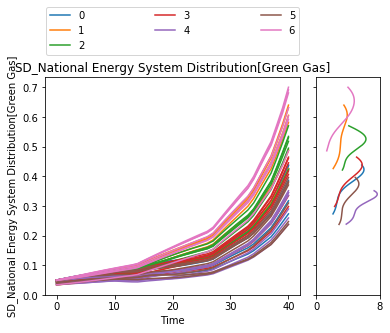

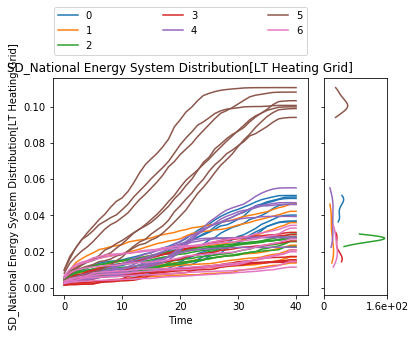

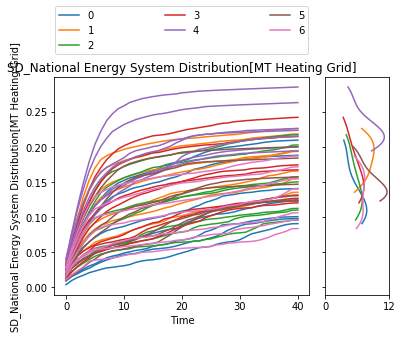

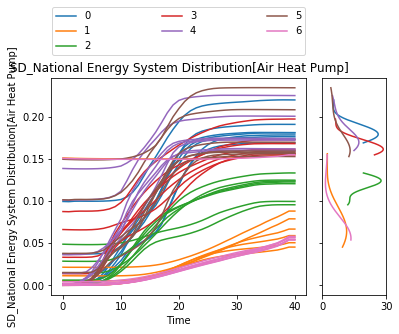

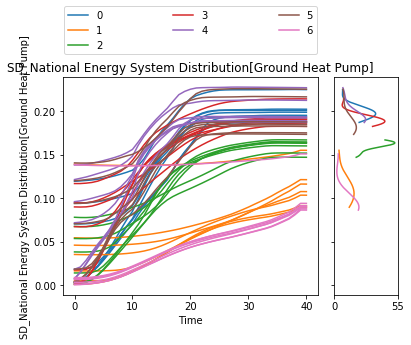

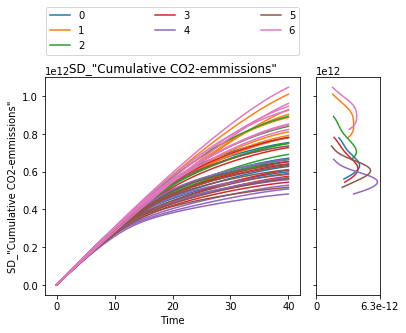

In [7]:
import matplotlib.pyplot as plt
from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis.plotting_util import Density

system_outcomes = ['SD_National Energy System Distribution[Green Gas]','SD_National Energy System Distribution[LT Heating Grid]', 'SD_National Energy System Distribution[MT Heating Grid]', 'SD_National Energy System Distribution[Air Heat Pump]', 'SD_National Energy System Distribution[Ground Heat Pump]','SD_"Cumulative CO2-emmissions"']

for i in system_outcomes:
    figure = lines(results[0], results[1], group_by = 'policy', outcomes_to_show=i, density = Density.KDE ) #show lines, and end state density
    plt.show() #show figure

In [ ]:
data = results[1]['Neighbourhood Data'][0]

In [8]:
results[0]

,ABM_Heat-company-ROI,ABM_Max-capital-inv-share,ABM_Max-income-inv-share,ABM_group-behaviour,SD_Base Investments Renewable,SD_Maximum cost reduction,ABM_LT-investment-subsidy,ABM_LT-production-subsidy,ABM_MT-investment-subsidy,ABM_MT-production-subsidy,ABM_insulation-subsidy,"SD_""CO2-tax-scheme""","SD_""NMTU-factor""",SD_Tax multiplier,scenario,policy,model
0,0.090839,0.088505,0.145023,0.074717,0.042465,0.376549,0.322937,0.057552,0.025371,0.365397,0.343978,2,1.121428,1.432499,0,0,UrbanEnergyTransition
1,0.112992,0.106858,0.076622,0.217306,0.036691,0.448416,0.322937,0.057552,0.025371,0.365397,0.343978,2,1.121428,1.432499,1,0,UrbanEnergyTransition
2,0.074433,0.107478,0.120791,0.395177,0.108436,0.422889,0.322937,0.057552,0.025371,0.365397,0.343978,2,1.121428,1.432499,2,0,UrbanEnergyTransition
3,0.121376,0.078375,0.086948,0.539087,0.078072,0.262517,0.322937,0.057552,0.025371,0.365397,0.343978,2,1.121428,1.432499,3,0,UrbanEnergyTransition
4,0.144321,0.064237,0.126705,0.634542,0.111641,0.317251,0.322937,0.057552,0.025371,0.365397,0.343978,2,1.121428,1.432499,4,0,UrbanEnergyTransition
5,0.047608,0.132178,0.102903,0.718927,0.056159,0.120957,0.322937,0.057552,0.025371,0.365397,0.343978,2,1.121428,1.432499,5,0,UrbanEnergyTransition
6,0.056428,0.141217,0.052297,0.956420,0.090561,0.160885,0.322937,0.057552,0.025371,0.365397,0.343978,2,1.121428,1.432499,6,0,UrbanEnergyTransition
7,0.090839,0.088505,0.145023,0.074717,0.042465,0.376549,0.131451,0.479315,0.350394,0.254390,0.433560,0,1.739683,1.194142,0,1,UrbanEnergyTransition
8,0.112992,0.106858,0.076622,0.217306,0.036691,0.448416,0.131451,0.479315,0.350394,0.254390,0.433560,0,1.739683,1.194142,1,1,UrbanEnergyTransition
9,0.074433,0.107478,0.120791,0.395177,0.108436,0.422889,0.131451,0.479315,0.350394,0.254390,0.433560,0,1.739683,1.194142,2,1,UrbanEnergyTransition


In [43]:
global_results = {k: results[1][k] for k in ('SD_"Cumulative CO2-emmissions"','SD_Percentage Renewable Electricity','SD_National Energy System Distribution[Green Gas]','SD_National Energy System Distribution[LT Heating Grid]', 'SD_National Energy System Distribution[MT Heating Grid]','SD_National Energy System Distribution[HT Heating Grid]', 'SD_National Energy System Distribution[Air Heat Pump]', 'SD_National Energy System Distribution[Ground Heat Pump]', 'SD_Average Gas Price', 'SD_Average Electricity Price', 'SD_Average Heat Price')}

In [52]:
pd.DataFrame(global_results['SD_National Energy System Distribution[Ground Heat Pump]'])

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.002649,0.005229,0.009285,0.014848,0.021405,0.028796,0.036771,0.045333,0.054019,0.062425,...,0.186836,0.187001,0.187178,0.187231,0.187234,0.187208,0.187175,0.187133,0.187089,0.187030
1,0.002401,0.004860,0.008900,0.014505,0.021225,0.029038,0.037842,0.047635,0.057749,0.067287,...,0.194693,0.194950,0.195086,0.195134,0.195159,0.195173,0.195176,0.195167,0.195154,0.195108
2,0.003644,0.005465,0.009369,0.015172,0.022363,0.030995,0.041092,0.052395,0.064138,0.075161,...,0.193973,0.194147,0.194235,0.194237,0.194198,0.194154,0.194106,0.194051,0.193994,0.193925
3,0.018187,0.018365,0.018858,0.020958,0.025914,0.032709,0.040598,0.049373,0.058552,0.067737,...,0.198416,0.198464,0.198562,0.198687,0.198761,0.198791,0.198785,0.198760,0.198725,0.198675
4,0.070409,0.070381,0.070568,0.071102,0.071926,0.072997,0.074328,0.076503,0.080074,0.085127,...,0.201775,0.201892,0.202054,0.202205,0.202257,0.202265,0.202247,0.202220,0.202191,0.202146
5,0.094294,0.094290,0.094530,0.095152,0.096015,0.097095,0.098351,0.099772,0.101342,0.103182,...,0.200872,0.200864,0.200851,0.200835,0.200827,0.200829,0.200837,0.200828,0.200760,0.200684
6,0.119321,0.119772,0.120296,0.120894,0.121681,0.122757,0.124116,0.125747,0.127618,0.129695,...,0.224540,0.224568,0.224594,0.224635,0.224675,0.224736,0.224815,0.224832,0.224772,0.224696
7,0.138971,0.138641,0.138367,0.138154,0.137983,0.137845,0.137734,0.137653,0.137600,0.137566,...,0.145564,0.146373,0.147154,0.148022,0.149043,0.150100,0.151220,0.152899,0.155003,0.154941
8,0.000942,0.000990,0.001288,0.001885,0.002740,0.003901,0.005407,0.007367,0.009730,0.012482,...,0.076167,0.077239,0.078212,0.079353,0.080808,0.082325,0.083922,0.086545,0.089601,0.089542
9,0.005018,0.005000,0.005017,0.005067,0.005169,0.005561,0.006573,0.008130,0.010184,0.012712,...,0.078824,0.079866,0.080828,0.081974,0.083375,0.084838,0.086307,0.088666,0.091416,0.091353


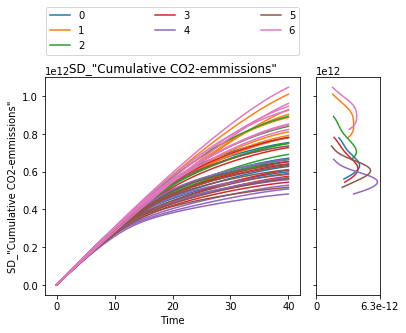

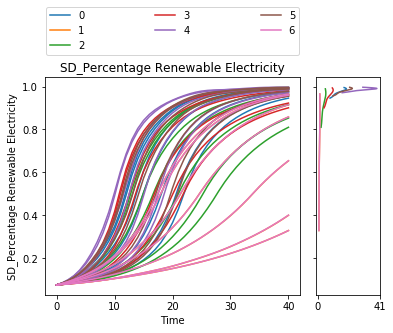

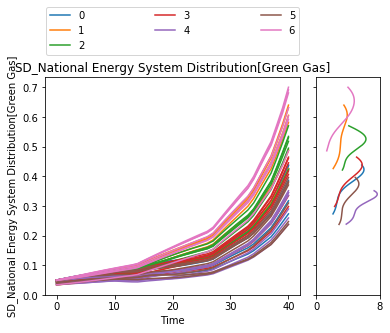

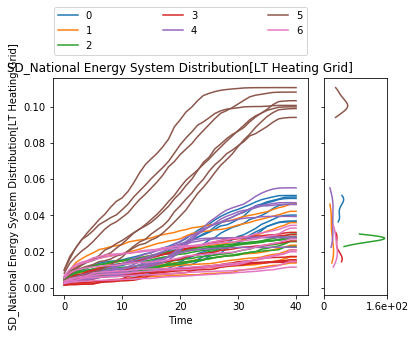

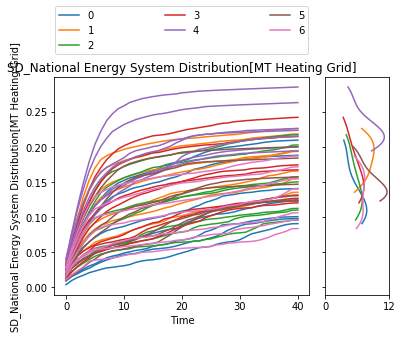

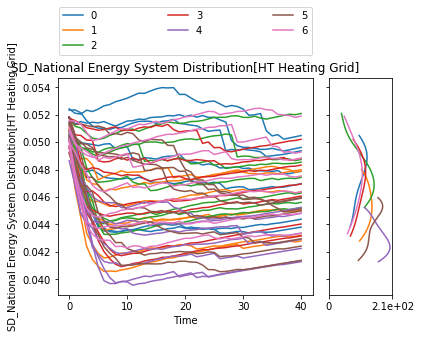

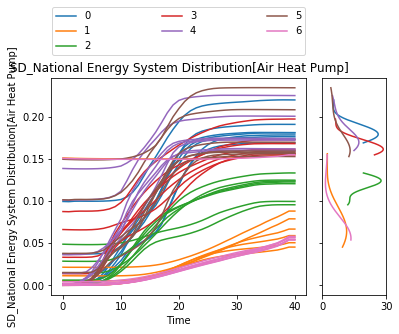

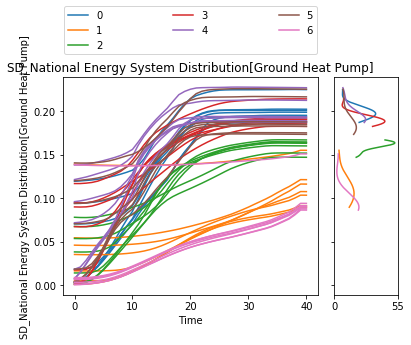

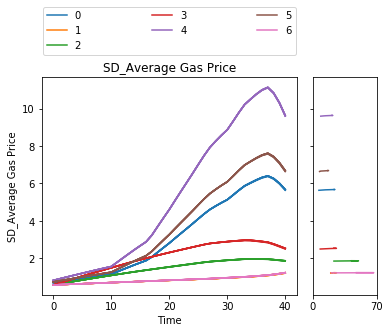

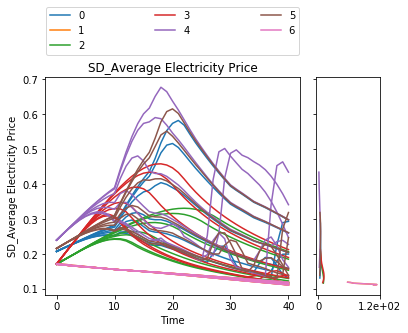

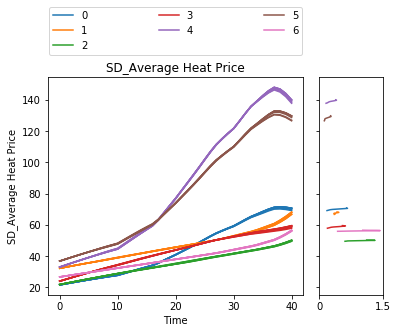

In [48]:
for i in global_results.keys():

    figure = lines(results[0], global_results, group_by = 'policy',outcomes_to_show = i, density = Density.KDE ) #show lines, and end state density
    plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


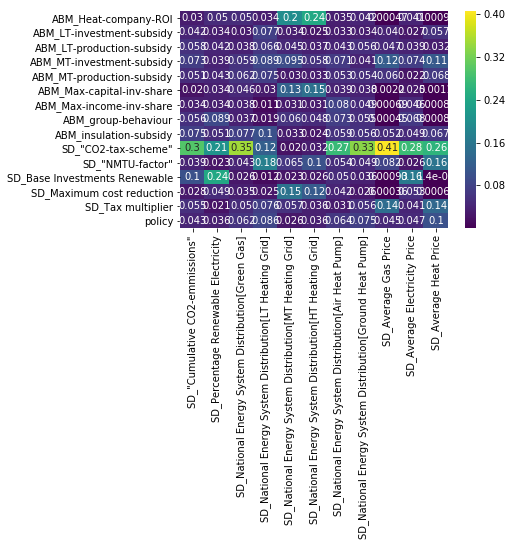

In [53]:
from ema_workbench.analysis import feature_scoring

x = results[0]
y = global_results

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

In [30]:
test = results[0].drop('SD_"CO2-tax-scheme"', axis = 1)

In [42]:
from ema_workbench.analysis import prim

x = results[0]
y = global_results['SD_"Cumulative CO2-emmissions"'] <0.6e12
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category


PrimException: y is not a 1-d array

In [27]:
from ema_workbench.analysis import dimensional_stacking

x = results[0]
y = global_results['SD_"Cumulative CO2-emmissions"'] < 0.7 * 10**12
dimensional_stacking.create_pivot_plot(x,y, nr_levels = 10, nbins=3)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category


ValueError: Must pass 2-d input

In [ ]:
data2 = pd.DataFrame(data=data[0:,0:])#,    # values
              #index=data[1:,0],    # 1st column as index
              #columns=data[0,1:])  # 1st row as the column names

In [ ]:
oneCol = []
colLength = len(data2.columns)
for k in range(colLength):
    oneCol.append(data2[k])
combined = pd.concat(oneCol, ignore_index=True)
#combined.str.split(',').apply(pd.Series)

In [ ]:
data = combined.str.rsplit(',', expand = True, n = 11)

In [ ]:
indexers = data[0].str.split(',', expand = True, n = 2)

In [ ]:
dataset = indexers.merge(data.iloc[:,1:], left_index = True, right_index = True)#

In [ ]:
dataset

In [ ]:
dataset ['2_x'] = dataset['2_x'].str.replace('"', '')

In [ ]:
dataset = dataset.set_index(['1_x','2_x',0]).sort_index()

In [ ]:
cityheating = dataset.loc[["'s-Gravenhage",0]].reset_index().astype(float, errors = 'ignore').pivot(index = 0, columns = '2_x', values = 8)

In [ ]:
labelG = dataset.loc[["'s-Gravenhage",0]].reset_index().astype(float, errors = 'ignore').pivot(index = 0, columns = '2_x', values = 3)

In [ ]:
import matplotlib.pyplot as plt
from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis.plotting_util import Density



In [ ]:
figure = lines(buurten, dict_labelG, density = Density.KDE ) #show lines, and end state density
plt.show() #show figure

In [ ]:
dict_output = {}
#dict_output['TIME'] = np.expand_dims(np.array(cityheating.index.astype(int)), axis=0)
for col in cityheating.columns:
     dict_output[col] = np.expand_dims(np.array(cityheating[col], dtype = float), axis=0)


In [ ]:
dict_cityheating = {}
dict_cityheating ['cityheating'] = cityheating.transpose().to_numpy().astype(float)

In [ ]:
dict_labelG = {}
dict_labelG['Label_G'] = labelG.transpose().to_numpy().astype(float)

In [ ]:
len(dict_cityheating['cityheating'][0])

In [ ]:
buurten = cityheating.unstack().to_frame().drop(0,axis = 1).reset_index().drop(0, axis = 1).drop_duplicates().reset_index(drop = True)